In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 300)

In [2]:
# Loading the data file into a Data Frame
telecom = pd.read_csv('telecom_churn_data.csv')

In [3]:
# Lets have a look at the first 5 rows
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
# Looking at the shape of the dataframe
print("There are {} rows or data points and {} features or columns".format(telecom.shape[0], telecom.shape[1]))
print(telecom.shape)

There are 99999 rows or data points and 226 features or columns
(99999, 226)


In [5]:
# Let's look at the info and some summary statistics

telecom.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [6]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [7]:
# Creating a deep copy of the data frame just in case we need to use the original data later on
original_df = telecom.copy()

In [8]:
#Checking for duplicate rows in the data
sum(telecom.duplicated())

0

There are no duplicated rows in the dataset

In [9]:
telecom.head(3)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,

#### DESCRIPTION OF SOME OF THE COLUMN NAMES

**loc_og_t2o_mou** - Local calls (within same circle) from operator T to other operators in terms of *minutes of usage*

**loc_ic_t2o_mou** - Same as above but for *incoming calls*

**arpu** - Average revenue

**onnet_mou** - All kinds of calls (incoming/outgoing) within same operator network minutes of usage

**offnet_mou** - All kinds of calls outside operator T network minutes of usage

**roam_ic_mou** and **roam_og_mou** - Roaming incoming and outgoing minutes of usage respectively

**t2t** and **t2m** - Calls within same operator mobile and other operator mobile respectively

**t2f** - Fixed lines of operator T

**t2c** - Calls to own call center of operator T

**std** - STD calls (calls outside local circle)

**rech_amt** - Recharge amount

**Please Note: 6, 7, 8, 9 refer to the months June, July, August & September respectively

**These are some of the important column name abbreviations from the data dictionary. Will be adding more description if and when necessary**

## Data Preparation

In [10]:
# Lets create column lists depending on type of each column

all_cols = telecom.columns

id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_cols = [col for col in telecom.columns if col not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == telecom.shape[1])

#ID cols: 2
#Date cols:12
#Numeric cols:204
#Category cols:8
True


### Handling the Missing Values

In [11]:
# Looking at percentage of missing values in descending order

round((telecom.isnull().sum() * 100/ len(telecom)),2).sort_values(ascending=False)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

**It can be seen that many of the recharge columns have high percentage of missing values, this is due to the fact that no recharge has been interpreted as missing value**

**Let us have a closer look at those columns**

In [12]:
recharge_cols = [col for col in telecom.columns if 'rech' in col]
telecom[recharge_cols].isnull().sum()

total_rech_num_6                0
total_rech_num_7                0
total_rech_num_8                0
total_rech_num_9                0
total_rech_amt_6                0
total_rech_amt_7                0
total_rech_amt_8                0
total_rech_amt_9                0
max_rech_amt_6                  0
max_rech_amt_7                  0
max_rech_amt_8                  0
max_rech_amt_9                  0
date_of_last_rech_6          1607
date_of_last_rech_7          1767
date_of_last_rech_8          3622
date_of_last_rech_9          4760
date_of_last_rech_data_6    74846
date_of_last_rech_data_7    74428
date_of_last_rech_data_8    73660
date_of_last_rech_data_9    74077
total_rech_data_6           74846
total_rech_data_7           74428
total_rech_data_8           73660
total_rech_data_9           74077
max_rech_data_6             74846
max_rech_data_7             74428
max_rech_data_8             73660
max_rech_data_9             74077
count_rech_2g_6             74846
count_rech_2g_

**Let us only focus on the recharge columns with missing values and those that are not date columns**

In [13]:
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

telecom[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


**It can be observed that the recharge date columns and recharge amount columns have the same number of missing data above, that implies that the missing value is for the time when the customer did not recharge**

In [14]:
# list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
               'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
               'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
               'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
               'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9'
              ]

# impute missing values with 0
telecom[zero_impute] = telecom[zero_impute].apply(lambda x: x.fillna(0))

In [15]:
telecom[recharge_cols].isnull().sum()

total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
total_rech_data_9     0
count_rech_2g_6       0
count_rech_2g_7       0
count_rech_2g_8       0
count_rech_2g_9       0
count_rech_3g_6       0
count_rech_3g_7       0
count_rech_3g_8       0
count_rech_3g_9       0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
max_rech_data_9       0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
av_rech_amt_data_9    0
dtype: int64

**We can now drop the date columns and ID columns. The reason for dropping the date columns is that they do not provide any useful information (Only mention the last date of month) and the month-wise transaction information is given in other columns**

In [16]:
# drop id and date columns
print("Shape before dropping: ", telecom.shape)
telecom.drop(id_cols + date_cols, axis=1, inplace=True)
print("Shape after dropping: ", telecom.shape)

Shape before dropping:  (99999, 226)
Shape after dropping:  (99999, 212)


#### Let's look at the categorical columns now

In [17]:
# missing value ratio
print("Missing value ratio:\n")
print(telecom[cat_cols].isnull().sum()*100/telecom.shape[0])

Missing value ratio:

night_pck_user_6    74.846748
night_pck_user_7    74.428744
night_pck_user_8    73.660737
night_pck_user_9    74.077741
fb_user_6           74.846748
fb_user_7           74.428744
fb_user_8           73.660737
fb_user_9           74.077741
dtype: float64


In [18]:
telecom['night_pck_user_6'].value_counts()

0.0    24522
1.0      631
Name: night_pck_user_6, dtype: int64

In [19]:
telecom[telecom['night_pck_user_6'].isnull()].head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
1,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.00,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.00,0.00,0.00,1.83,0.00,0.0,0.00,0.00,0.00,0.00,0.00,4,9,11,5,74,384,283,121,44,154,65,50,44,23,30,0,0.0,1.0,2.0,0.0,0.0,154.0,25.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,154.0,50.0,0.0,0.0,108.07,365.47,0.0,0.0,0.0,0.0,0.00,NaN,0.0,0.0,NaN,NaN,28.61,7.6,NaN,NaN,0.0,

**We believe the missing values are cases where the night pack or facebook pack in question was not used. Therefore they should be 0. Thus we will impute them with 0**

**Please note, this is an extremely skewed category with barely any users using those packs (1) and hence will most likely be dropped later on as it will not help with the model building**

## ARISH: I believe these columns can be dropped as they are waaaaaay too skewed, what say you? For now i'm imputing with 0

In [20]:
# replace missing values with '0' in categorical columns
telecom[cat_cols] = telecom[cat_cols].apply(lambda x: x.fillna(0))

In [21]:
# missing value ratio
print("Missing value ratio:\n")
print(telecom[cat_cols].isnull().sum()*100/telecom.shape[0])

Missing value ratio:

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64


In [22]:
# Looking at percentage of missing values in descending order
for col in telecom.columns:
    if telecom[col].isnull().sum() > 0:
        print(col, " missing = ", round(telecom[col].isnull().sum() * 100/ len(telecom), 2))

loc_og_t2o_mou  missing =  1.02
std_og_t2o_mou  missing =  1.02
loc_ic_t2o_mou  missing =  1.02
onnet_mou_6  missing =  3.94
onnet_mou_7  missing =  3.86
onnet_mou_8  missing =  5.38
onnet_mou_9  missing =  7.75
offnet_mou_6  missing =  3.94
offnet_mou_7  missing =  3.86
offnet_mou_8  missing =  5.38
offnet_mou_9  missing =  7.75
roam_ic_mou_6  missing =  3.94
roam_ic_mou_7  missing =  3.86
roam_ic_mou_8  missing =  5.38
roam_ic_mou_9  missing =  7.75
roam_og_mou_6  missing =  3.94
roam_og_mou_7  missing =  3.86
roam_og_mou_8  missing =  5.38
roam_og_mou_9  missing =  7.75
loc_og_t2t_mou_6  missing =  3.94
loc_og_t2t_mou_7  missing =  3.86
loc_og_t2t_mou_8  missing =  5.38
loc_og_t2t_mou_9  missing =  7.75
loc_og_t2m_mou_6  missing =  3.94
loc_og_t2m_mou_7  missing =  3.86
loc_og_t2m_mou_8  missing =  5.38
loc_og_t2m_mou_9  missing =  7.75
loc_og_t2f_mou_6  missing =  3.94
loc_og_t2f_mou_7  missing =  3.86
loc_og_t2f_mou_8  missing =  5.38
loc_og_t2f_mou_9  missing =  7.75
loc_og_t2c_m

**We can see that the only columns with the highest number of missing values are arpu_3g* and arpu_2g*.**

**arpu_3g* or _2g* stands for average revenue per user for the respective 3g or 2g networks**

**Earlier we imputed the values for recharge that were missing with 0 because we determined that those values were not missing but read as missing due to the user not recharging in that month. We believe the same is the case here and hence will impute those values with zero again**

In [23]:
to_zero = ['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9',
           'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9']

# impute missing values with 0
telecom[to_zero] = telecom[to_zero].apply(lambda x: x.fillna(0))

**Very few missing values remain now and those shall be imputed with the median**

In [24]:
missing_cols = telecom.columns[telecom.isnull().sum()>0]
for col in missing_cols:
    telecom[col].fillna((telecom[col].median()), inplace=True)

In [25]:
# Looking at percentage of missing values in descending order
for col in telecom.columns:
    if telecom[col].isnull().sum() > 0:
        print(col, " missing = ", round(telecom[col].isnull().sum() * 100/ len(telecom), 2))

## Filtering High Value Customers

**This step will be used to filter customers considered as high value as per the business guidelines**

In [26]:
# Creating a new column for total spent during the good phase. This is total recharge amount + total data recharged

# First we calculate the total spent on data

telecom['data_spend_6'] = telecom.total_rech_data_6 * telecom.av_rech_amt_data_6
telecom['data_spend_7'] = telecom.total_rech_data_7 * telecom.av_rech_amt_data_7

In [27]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount

telecom['amt_total_6'] = telecom.total_rech_amt_6 + telecom.data_spend_6
telecom['amt_total_7'] = telecom.total_rech_amt_7 + telecom.data_spend_7

In [28]:
# We can now use the average of these two new columns to calculate the HVCs

telecom['good_phase_av'] = (telecom['amt_total_6'] + telecom['amt_total_7'])/2

In [29]:
# look at the 70th percentile recharge amount
print("Average good phase spending amount at 70th percentile: {0}".format(telecom.good_phase_av.quantile(0.7)))

Average good phase spending amount at 70th percentile: 478.0


In [30]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
telecom_hvc = telecom.loc[telecom.good_phase_av >= telecom.good_phase_av.quantile(0.7), :]
telecom_hvc = telecom_hvc.reset_index(drop=True)
telecom_hvc.shape

(30001, 217)

In [31]:

# delete variables created to filter high-value customers
telecom_hvc.drop(['data_spend_6', 'data_spend_7', 'amt_total_6', 'amt_total_7'], axis=1, inplace=True)
telecom_hvc.shape

(30001, 213)

## Next we need to derive the customers who churned and there's also a bunch of feature engineering/ column dropping that we can do

### Handling Redundent Columns

In [32]:
#Checking for columns with only one unique value
nunique_df = telecom_hvc.nunique().sort_values()
nunique_df[nunique_df == 1]

loc_og_t2o_mou      1
std_og_t2o_mou      1
loc_ic_t2o_mou      1
std_ic_t2o_mou_6    1
std_og_t2c_mou_6    1
std_og_t2c_mou_7    1
std_og_t2c_mou_8    1
std_og_t2c_mou_9    1
std_ic_t2o_mou_9    1
std_ic_t2o_mou_8    1
std_ic_t2o_mou_7    1
dtype: int64

In [33]:
# Lets see what values these columns have 
single_val_columns = nunique_df[nunique_df == 1].index
telecom_hvc[single_val_columns]

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_ic_t2o_mou_6,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_ic_t2o_mou_9,std_ic_t2o_mou_8,std_ic_t2o_mou_7
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
29996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# Removing columns with all zero values
telecom_hvc.drop(single_val_columns, axis=1, inplace = True)
telecom_hvc.shape

(30001, 202)

### Tagging customers who churned 

In [35]:
#Lets see the columns we will be using to tag churned customers
telecom_hvc[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head(5)

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00
2,34.91,142.18,0.00,0.00
3,252.61,1031.53,0.00,0.00
4,127.48,127.63,13.93,314.74


In [36]:
# Churned customers will be 1 and non churned customers will be zero

# Function to label customers
def churn_label(row):
    if(sum(row[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]) == 0):
        return 1
    return 0

telecom_hvc['churn'] = telecom_hvc.apply(lambda x: churn_label(x), axis=1)
telecom_hvc['churn'].head(5)

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int64

In [37]:
# Checking the percentage of customers who churned 

round(telecom_hvc['churn'].value_counts()/len(telecom_hvc)*100,2)

0    91.86
1     8.14
Name: churn, dtype: float64

The percentage of customers who churned is around 8 % which is close to what we were expecting

In [38]:
# Dropping columns related to the last month to prevent any data leakage i.e 9th month column

#Finding the columns with _9 in the name
month_9_cols = [col for col in telecom_hvc.columns if '_9' in col]
print("Columns that belong to the 9th month \n")
print()
print(month_9_cols)


Columns that belong to the 9th month 


['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9']


In [39]:
#Dropping all the 9th month columns
telecom_hvc.drop(month_9_cols, axis=1, inplace=True)

telecom_hvc.shape

(30001, 154)

### Let us look at the correlation between the variables

In [40]:
cor = telecom_hvc.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.60) | (cor < -0.60)].sort_values()

roam_og_mou_8     roam_og_mou_7         0.601079
monthly_3g_6      vol_3g_mb_6           0.601308
arpu_2g_6         arpu_3g_7             0.601974
total_ic_mou_7    loc_ic_t2t_mou_7      0.602134
fb_user_6         av_rech_amt_data_6    0.602293
                                          ...   
total_rech_amt_6  arpu_6                0.946125
total_rech_amt_8  arpu_8                0.955351
sachet_2g_6       count_rech_2g_6       0.984924
sachet_2g_7       count_rech_2g_7       0.986408
sachet_2g_8       count_rech_2g_8       0.987161
Length: 302, dtype: float64

**It can be seen that there is some very high correlation between the variables of the 6th and 7th months. This is the good phase of the customer so we could derive new features from them as an average of those two columns**

### Deriving the new features

In [41]:
# create a new column which is the average of the 6th and 7th months
# lets first create list of columns belonging to 6th and 7th months

col_list = telecom_hvc.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()


# lets take the average now
for idx, col in enumerate(col_list.unique()):
    avg_col_name = "avg_"+col+"_gp" # lets create the column name dynamically
    col_6 = col+"_6"
    col_7 = col+"_7"
    telecom_hvc[avg_col_name] = (telecom_hvc[col_6]  + telecom_hvc[col_7])/ 2
    
print (telecom_hvc.shape)

(30001, 203)


In [42]:
# we dont need columns from which we have derived new features, we will drop those columns

print ("dimension of the updated dataset after creating dervied features: ", telecom_hvc.shape)

col_to_drop = telecom_hvc.filter(regex='_6|_7').columns
telecom_hvc.drop(col_to_drop, axis=1, inplace=True)

print("dimension of the dataset after dropping unnecessary columns: ", telecom_hvc.shape)

dimension of the updated dataset after creating dervied features:  (30001, 203)
dimension of the dataset after dropping unnecessary columns:  (30001, 105)


In [43]:
telecom_hvc.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,good_phase_av,churn,avg_arpu_gp,avg_onnet_mou_gp,avg_offnet_mou_gp,avg_roam_ic_mou_gp,avg_roam_og_mou_gp,avg_loc_og_t2t_mou_gp,avg_loc_og_t2m_mou_gp,avg_loc_og_t2f_mou_gp,avg_loc_og_t2c_mou_gp,avg_loc_og_mou_gp,avg_std_og_t2t_mou_gp,avg_std_og_t2m_mou_gp,avg_std_og_t2f_mou_gp,avg_std_og_mou_gp,avg_isd_og_mou_gp,avg_spl_og_mou_gp,avg_og_others_gp,avg_total_og_mou_gp,avg_loc_ic_t2t_mou_gp,avg_loc_ic_t2m_mou_gp,avg_loc_ic_t2f_mou_gp,avg_loc_ic_mou_gp,avg_std_ic_t2t_mou_gp,avg_std_ic_t2m_mou_gp,avg_std_ic_t2f_mou_gp,avg_std_ic_mou_gp,avg_total_ic_mou_gp,avg_spl_ic_mou_gp,avg_isd_ic_mou_gp,avg_ic_others_gp,avg_total_rech_num_gp,avg_total_rech_amt_gp,avg_max_rech_amt_gp,avg_last_day_rch_amt_gp,avg_total_rech_data_gp,avg_max_rech_data_gp,avg_count_rech_2g_gp,avg_count_rech_3g_gp,avg_av_rech_amt_data_gp,avg_vol_2g_mb_gp,avg_vol_3g_mb_gp,avg_arpu_3g_gp,avg_arpu_2g_gp,avg_night_pck_user_gp,avg_monthly_2g_gp,avg_sachet_2g_gp,avg_monthly_3g_gp,avg_sachet_3g_gp,avg_fb_user_gp
0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.00,5.44,0.0,0.00,0.00,2,252,252,252,1.0,252.0,0.0,1.0,252.0,5.75,109.61,212.17,212.17,0.0,0,0,1,0,1.0,968,30.40,0.00,101.20,3.58,559.0,1,206.1005,33.32,94.0225,0.00,0.000,11.760,40.730,0.000,0.0,64.3975,0.000,3.7925,0.00,11.365,0.000,0.00,0.0,0.000,15.715,56.785,0.905,92.355,0.000,2.035,0.000,5.925,0.000,0.000,0.000,0.000,3.5,307.0,252.0,252.0,1.0,252.0,0.0,1.0,252.0,15.725,117.165,212.170,212.17,0.0,0.0,0.0,1.0,0.0,1.0
1,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0,802,57.74,19.38,18.74,0.00,1185.0,1,1209.5150,56.26,510.2950,24.86,18.165,41.385,378.005,58.635,0.0,478.0350,13.795,40.8250,13.37,68.000,0.090,2.25,0.0,548.385,45.200,219.525,126.810,391.555,24.360,109.215,43.215,176.810,592.250,0.105,8.295,15.465,5.0,1185.0,1185.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,10,3.0,23.0,3.0,0.0,69.0,0.03,11.94,19.83,0.00,0.0,0,3,0,0,1.0,315,21.03,910.65,122.16,0.00,696.0,0,435.4720,382.36,87.6450,0.00,0.000,257.360,75.770,0.000,0.0,333.1350,124.995,11.8650,0.00,136.870,0.000,0.00,0.0,470.010,16.840,35.780,0.000,52.630,0.290,13.255,0.000,13.545,66.175,0.000,0.000,0.000,20.0,519.0,122.0,25.0,1.0,77.0,1.0,0.0,88.5,178.000,375.475,0.000,0.00,0.0,0.5,0.5,0.0,0.0,0.5
3,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.0,0.00,0.00,27,718,50,50,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0,720,0.00,0.00,0.00,0.00,640.0,0,556.1030,117.26,827.3050,0.00,0.000,5.320,89.870,0.375,0.0,95.5650,111.935,737.0500,0.00,848.990,0.000,0.00,0.0,944.565,6.335,96.430,3.725,106.505,10.020,52.960,0.000,62.985,169.490,0.000,0.000,0.000,24.0,640.0,50.0,25.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0

## EDA through Visualisation

### We'll fill this up at the end. I have no energy to do it now

## Outlier Removal
**As seen in the visualisation, there are several outliers in the data, let us remove the values over 1.5*IQR for the numerical variables**

<font color='green'> Arish, this below step removes around 50% of the values in the DF, do we really need it? </font>



In [44]:
#from scipy import stats

#z_scores = stats.zscore(telecom_hvc)
#abs_zscores = abs(z_scores)
#filtered_entries = (abs_zscores < 3).all(axis=1)

#telecom_final = telecom_hvc[filtered_entries]

In [45]:
#telecom_final.shape

In [46]:
#telecom_final.describe()

# Modelling

In [47]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB

In [48]:
# Checking if all data is in numeric format because PCA requires numeric data

for col in telecom_hvc.columns:
    if telecom_hvc[col].dtype == 'object':
        print("There are non-numerical columns")
        break

### Train Test Split

In [49]:
# divide data into train and test
X = telecom_hvc.drop("churn", axis = 1)
y = telecom_hvc.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 27)

In [50]:
print("Shape of X_train is {} and X_test is {}".format(X_train.shape, X_test.shape))

Shape of X_train is (24000, 104) and X_test is (6001, 104)


**Therea are four particular columns with very skewed values of only 0 and 1.**

**Those columns are: avg_fb_user_gp, avg_night_pck_user_gp, fb_user_8 and night_pck_user_8**

## @Arish, this is okay for PCA, right? I'm not sure what to do with them

In [51]:
print(X_train['fb_user_8'].value_counts())
print(X_train['night_pck_user_8'].value_counts())
print(X_train['avg_fb_user_gp'].value_counts())
print(X_train['avg_night_pck_user_gp'].value_counts())

0.0    12557
1.0    11443
Name: fb_user_8, dtype: int64
0.0    23732
1.0      268
Name: night_pck_user_8, dtype: int64
1.0    10642
0.0     9611
0.5     3747
Name: avg_fb_user_gp, dtype: int64
0.0    23530
0.5      317
1.0      153
Name: avg_night_pck_user_gp, dtype: int64


# Principal Component Analysis

### We can use PCA to askdlaskdjlaksfj

In [52]:
# apply pca to train data with standard scaling

pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [53]:
telecom_pca = pipe.fit_transform(X_train)


In [54]:
# extract pca model from pipeline
pca = pipe.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       12.46
1       22.73
2       29.63
3       35.41
4       39.44
5       43.00
6       45.99
7       48.81
8       51.35
9       53.76
10      56.03
11      58.21
12      60.22
13      62.18
14      64.11
15      65.93
16      67.57
17      69.18
18      70.66
19      72.04
20      73.41
21      74.70
22      75.93
23      77.14
24      78.26
25      79.36
26      80.36
27      81.32
28      82.24
29      83.12
30      83.96
31      84.77
32      85.56
33      86.35
34      87.11
35      87.78
36      88.44
37      89.09
38      89.70
39      90.29
40      90.86
41      91.42
42      91.92
43      92.39
44      92.83
45      93.27
46      93.68
47      94.07
48      94.45
49      94.81
50      95.12
51      95.42
52      95.70
53      95.99
54      96.26
55      96.52
56      96.77
57      97.01
58      97.24
59      97.47
60      97.68
61      97.90
62      98.10
63      98.31
64      98.51
65      98.69
66      98.87
67      99.03
68      99.16
69      99.29
70      99.40
71    

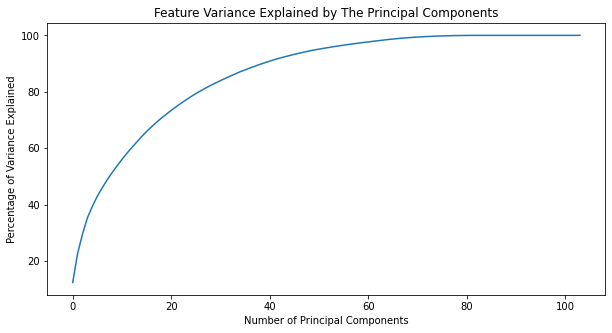

In [55]:
# plot feature variance

features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)

plt.figure(figsize=(200/20,100/20))
plt.plot(cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Percentage of Variance Explained')
plt.title('Feature Variance Explained by The Principal Components')

plt.show()

**About 40 Principal Components explain ~= 90% variance in the data**

**We will use 42 to be on the safe side**

### We can now try both Logistic Regression and XGBoost to determine the best model (Along with PCA)

## Logistic Regression with PCA

In [56]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.917958
1    0.082042
Name: churn, dtype: float64

**There is high class imbalance and hence we can apply class weights in the Logistic Regression**

In [57]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("log_reg", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [40, 45, 50], 'log_reg__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'log_reg__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 27)

# create gridsearch object
model = GridSearchCV(estimator = pca_logistic, cv = folds, param_grid = params, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

In [58]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   44.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=27, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('log_reg',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'log_reg__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'log_reg__penalty': ['l1', 'l2'],
                         'pca__n_components': [40, 45, 50]},
             scoring='roc_auc', verbose=1)

In [59]:
# cross validation results
pd.DataFrame(model.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_log_reg__C,param_log_reg__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.586918,0.112223,0.000000,0.000000,0.1,l1,40,"{'log_reg__C': 0.1, 'log_reg__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,48
1,2.762524,0.205376,0.000000,0.000000,0.1,l1,45,"{'log_reg__C': 0.1, 'log_reg__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,27
2,2.101411,0.528939,0.000000,0.000000,0.1,l1,50,"{'log_reg__C': 0.1, 'log_reg__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
3,1.903715,0.218795,0.056230,0.015718,0.1,l2,40,"{'log_reg__C': 0.1, 'log_reg__penalty': 'l2', ...",0.873414,0.881120,0.886680,0.894799,0.877084,0.882620,0.007516,22
4,2.116526,0.420869,0.084358,0.024804,0.1,l2,45,"{'log_reg__C': 0.1, 'log_reg__penalty': 'l2', ...",0.878874,0.883219,0.889098,0.897941,0.878114,0.885449,0.007367,16


In [60]:
# print best hyperparameters

print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.888128773734997
Best hyperparameters:  {'log_reg__C': 10, 'log_reg__penalty': 'l2', 'pca__n_components': 50}


In [61]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity = cm[0][0]/(cm[0][0] + cm[0][1])
specificity = cm[1][1]/(cm[1][0] + cm[1][1])
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC: \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[4650  879]
 [  88  384]]
Sensitivity: 	0.84
Specificity: 	0.81
AUC: 	 0.89


### As per the business objective, we want a high sensitivity and our model has achieved that

## XGBoost Classifier with PCA

**We will be using a Boosting algorithm,in perticular XGBoost because of its ability to handle class imbalance well.**

In [62]:
#Let us once again get the shapes of our training and test datasets
print("Shape of X_train is {} and X_test is {}".format(X_train.shape, X_test.shape))
print("Shape of y_train is {} and y_test is {}".format(y_train.shape, y_test.shape))

Shape of X_train is (24000, 104) and X_test is (6001, 104)
Shape of y_train is (24000,) and y_test is (6001,)


In [63]:
# Using 50 as the number of components for PCA

# Applying PCA to train data with standard scaling

pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=50,random_state=42))])

df_train_pca = pipe.fit_transform(X_train)

df_train_pca.shape

(24000, 50)

In [64]:
# Applying PCA to test data
df_test_pca = pipe.transform(X_test)
df_test_pca.shape

(6001, 50)

In [65]:
# Hyperparameter tuning for xgboost
xgb_model = XGBClassifier()

parameters = {'learning_rate': [0.7,0.9],
              'max_depth': [2, 4],
              'min_child_weight': [15,25]}

scorer = make_scorer(roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring=scorer,
                                       refit=True,
                                        verbose = 1)

clf_xgb.fit(df_train_pca, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   48.5s finished


[09:31:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [66]:
#Taking the best model hyperparameters
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.7, 'max_depth': 2, 'min_child_weight': 25}
0.8853617521108305
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.7, max_delta_step=0, max_depth=2,
              min_child_weight=25, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [67]:
# Using the best model hyperparameters to build the final XGboost model
final_model = XGBClassifier(learning_rate=0.7,
                               max_depth=2,
                               min_child_weight=25)

final_model.fit(df_train_pca, y_train)

print('AUC on train data by XGBoost =', roc_auc_score(y_true=y_train,
                                                              y_score=final_model.predict_proba(df_train_pca)[:, 1]))

print('AUC on test data by XGBoost =', roc_auc_score(y_true=y_test,
                                                             y_score=final_model.predict_proba(df_test_pca)[:, 1]))

# predict churn on test data
y_pred = final_model.predict(df_test_pca)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity = cm[0][0]/(cm[0][0] + cm[0][1])
specificity = cm[1][1]/(cm[1][0] + cm[1][1])
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = final_model.predict_proba(df_test_pca)[:, 1]
print("AUC: \t", round(roc_auc_score(y_test, y_pred_prob),2))
print("Accuracy: \t",round(accuracy_score(y_test, y_pred),2))

[09:31:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC on train data by XGBoost = 0.9388852989574066
AUC on test data by XGBoost = 0.8864753181223196
[[5407  122]
 [ 301  171]]
Sensitivity: 	0.98
Specificity: 	0.36
AUC: 	 0.89
Accuracy: 	 0.93


## Ensemble of XGBoost Classifier with Logistic Regression and Gaussian Naive Bayes with PCA to get the best model

**Taking the ensemble of three models to get a more robust and generalized model .**

In [68]:
# Using the best hyperparameters from the previous steps for Logistic Regression and XGBoost classifier 
# to combine with Gaussian Naive Bayes classifier

clf1 = LogisticRegression(C=4, penalty='l2')
clf2 = XGBClassifier(learning_rate=0.7, max_depth=2, min_child_weight=25)
clf3 = GaussianNB()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('xgb', clf2), ('gnb', clf3)], voting='soft')

eclf1.fit(df_train_pca, y_train)
print('AUC on train data by XGBoost =', roc_auc_score(y_true=y_train,
                                                              y_score=eclf1.predict_proba(df_train_pca)[:, 1]))

print('AUC on test data by XGBoost =', roc_auc_score(y_true=y_test,
                                                             y_score=eclf1.predict_proba(df_test_pca)[:, 1]))

# predict churn on test data
y_pred = eclf1.predict(df_test_pca)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity = cm[0][0]/(cm[0][0] + cm[0][1])
specificity = cm[1][1]/(cm[1][0] + cm[1][1])
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = eclf1.predict_proba(df_test_pca)[:, 1]
print("AUC: \t", round(roc_auc_score(y_test, y_pred_prob),2))
print("Accuracy: \t",round(accuracy_score(y_test, y_pred),2))

[09:31:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC on train data by XGBoost = 0.9047688908000013
AUC on test data by XGBoost = 0.8805263311169765
[[5355  174]
 [ 261  211]]
Sensitivity: 	0.97
Specificity: 	0.45
AUC: 	 0.88
Accuracy: 	 0.93


## Feature Importance

**The second part of the business problem is to identify the important features to predict churn. This cannot be done on the PCA model as the Principal Components are combinations of our original features. For this reason we will run an XGBoost model and use it to understand feature importance**

In [124]:
classifier = XGBClassifier(learning_rate=0.7, max_depth=2, min_child_weight=25, random_state = 27, booster='gblinear')

In [125]:
# create pipeline
steps = [("scaler", StandardScaler()),
         ("classifier", classifier)
        ]

# compile pipeline
feature_imp = Pipeline(steps)

In [126]:
feature_imp.fit(X_train, y_train)

[11:02:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { max_depth, min_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:02:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 XGBClassifier(base_score=0.5, booster='gblinear',
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, gamma=None, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints=None, learning_rate=0.7,
                               max_delta_step=None, max_depth=2,
                               min_child_weight=25, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=12, num_parallel_tree=None,
                               random_state=27, reg_alpha=0, reg_lambda=0,
                               scale_pos_weight=1, subsample=None,
                               tree_method=None, validate_parameters=1,
                               verbosity=None))])

In [127]:
y_pred = feature_imp.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity = cm[0][0]/(cm[0][0] + cm[0][1])
specificity = cm[1][1]/(cm[1][0] + cm[1][1])
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = final_model.predict_proba(df_test_pca)[:, 1]
print("AUC: \t", round(roc_auc_score(y_test, y_pred_prob),2))
print("Accuracy: \t",round(accuracy_score(y_test, y_pred),2))

[[5460   69]
 [ 287  185]]
Sensitivity: 	0.99
Specificity: 	0.39
AUC: 	 0.89
Accuracy: 	 0.94


In [134]:
# predictors
features = X_train.columns

# feature_importance
importance = feature_imp[1].coef_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'Coefficients': importance*100})
feature_importance = feature_importance[['variables', 'Coefficients']]

# sort features
feature_importance = feature_importance.sort_values('Coefficients', ascending=False).reset_index(drop=True)
print("Sum of coefficients=", feature_importance.Coefficients.sum())
feature_importance

Sum of coefficients= -406.4862215999998


,variables,Coefficients
0,loc_og_mou_8,251.967000
1,std_ic_mou_8,199.695000
2,loc_ic_t2m_mou_8,129.918000
3,onnet_mou_8,124.354000
4,loc_ic_t2t_mou_8,110.676000
5,offnet_mou_8,91.253500
6,isd_ic_mou_8,89.010800
7,loc_ic_mou_8,70.486200
8,arpu_8,55.926400
9,avg_loc_ic_t2m_mou_gp,49.573300


In [136]:
# Selecting the top and bottom n features

n = 10 # this is number of features top
sorter = np.append(feature_importance[:n], feature_importance[-n:])

In [152]:
cols = []
for i in range(len(sorter)):
    if i%2 == 0:
        cols.append(sorter[i])

['loc_og_mou_8',
 'std_ic_mou_8',
 'loc_ic_t2m_mou_8',
 'onnet_mou_8',
 'loc_ic_t2t_mou_8',
 'offnet_mou_8',
 'isd_ic_mou_8',
 'loc_ic_mou_8',
 'arpu_8',
 'avg_loc_ic_t2m_mou_gp',
 'fb_user_8',
 'avg_total_ic_mou_gp',
 'av_rech_amt_data_8',
 'std_og_mou_8',
 'total_rech_amt_8',
 'total_og_mou_8',
 'sep_vbc_3g',
 'loc_og_t2m_mou_8',
 'loc_og_t2t_mou_8',
 'total_ic_mou_8']

In [168]:
for thing in feature_importance.variables:
    if thing in cols:
        continue
    else:
        feature_importance = feature_importance[feature_importance.variables != thing]
        
feature_importance

,variables,Coefficients
0,loc_og_mou_8,251.9670
1,std_ic_mou_8,199.6950
2,loc_ic_t2m_mou_8,129.9180
3,onnet_mou_8,124.3540
4,loc_ic_t2t_mou_8,110.6760
5,offnet_mou_8,91.2535
6,isd_ic_mou_8,89.0108
7,loc_ic_mou_8,70.4862
8,arpu_8,55.9264
9,avg_loc_ic_t2m_mou_gp,49.5733


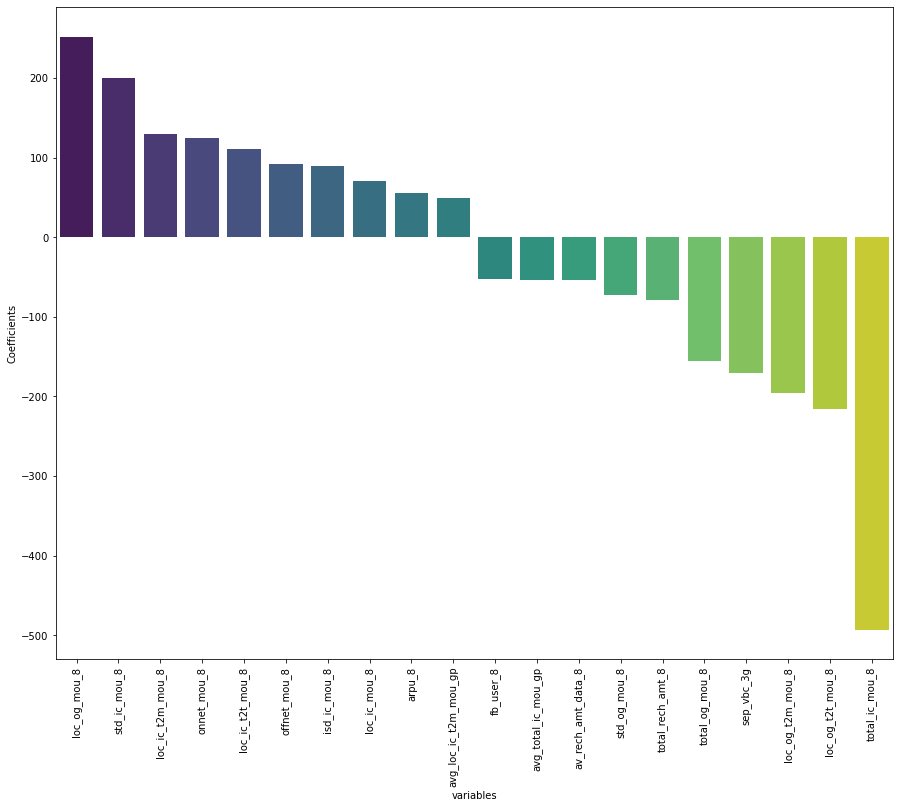

In [170]:
#Plotting the top 30 features

plt.figure(figsize=(15, 12))
sns.barplot(x='variables', y='Coefficients', data=feature_importance, palette='viridis')
plt.xticks(rotation=90)

plt.show()

### Using Random Forest To Calculate Feature Importance

In [171]:
# run a random forest model on train data

max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, 
                                  oob_score=True, random_state=4, verbose=1)

10


In [172]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.1s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=10,
                       oob_score=True, random_state=4, verbose=1)

In [173]:
# OOB score
rf_model.oob_score_

0.9422916666666666

In [174]:
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity = cm[0][0]/(cm[0][0] + cm[0][1])
specificity = cm[1][1]/(cm[1][0] + cm[1][1])
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = final_model.predict_proba(df_test_pca)[:, 1]
print("AUC: \t", round(roc_auc_score(y_test, y_pred_prob),2))
print("Accuracy: \t",round(accuracy_score(y_test, y_pred),2))

[[5472   57]
 [ 260  212]]
Sensitivity: 	0.99
Specificity: 	0.45
AUC: 	 0.89
Accuracy: 	 0.95


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [176]:
# predictors
features = X_train.columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,total_ic_mou_8,6.655573
1,last_day_rch_amt_8,4.958521
2,total_og_mou_8,4.610949
3,loc_ic_mou_8,4.554211
4,loc_ic_t2m_mou_8,4.020149
5,total_rech_amt_8,3.661549
6,arpu_8,3.388146
7,max_rech_amt_8,3.179067
8,roam_og_mou_8,3.020245
9,roam_ic_mou_8,2.303341


#### Heading for therapy now, will continue from here later on